In [1]:
conda install -c anaconda mysql-connector-python

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/issac/opt/miniconda3

  added / updated specs:
    - mysql-connector-python


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |   py39hca03da5_0         424 KB  anaconda
    ca-certificates-2023.08.22 |       hca03da5_0         131 KB  anaconda
    certifi-2023.11.17         |   py39hca03da5_0         160 KB  anaconda
    conda-23.9.0               |   py39hca03da5_0        1002 KB  anaconda
    cryptography-41.0.3        |   py39h3c57c4d_0         1.3 MB  anaconda
    jsonpatch-1.32             |     pyhd3eb1b0_0          14 KB  anaconda
    jsonpointer-2.1            |     pyhd3eb1b0_0        

In [1]:
import mysql.connector

In [4]:
import pandas as pd

In [37]:
conn=mysql.connector.connect(host='localhost', user='root',password='Elsastar123#',database='newwheels',use_pure=True)

In [8]:
# Function to execute SQL queries and return results as a DataFrame
def execute_query(query):
    try:
        # Use pandas to read the SQL query into a DataFrame
        result = pd.read_sql_query(query, conn)
        return result
    except Exception as e:
        print(f"Error: {e}")

In [9]:
# Test the connection and execute a sample query
query_sample = "SELECT * FROM customer_t LIMIT 5"
result_sample = execute_query(query_sample)

# Display the result
result_sample

/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82052/2240019407.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(query, conn)


,customer_id,customer_name,gender,job_title,phone_number,email_address,city,country,state,customer_address,postal_code,credit_card_type,credit_card_number
0,0002-4115,Rafaela Hummerston,Female,Research Associate,862-362-4311,rhummerstoncg@unblog.fr,Newark,United States,New Jersey,556 Gerald Lane,7195,diners-club-enroute,4980000000000000
1,0002-4465,Minerva Noir,Female,Safety Technician II,317-472-9307,mnoirfc@mlb.com,Indianapolis,United States,Indiana,8958 Glacier Hill Crossing,46221,jcb,1300000000000000
2,0002-7597,Foss Ratcliffe,Male,Chief Design Engineer,360-923-0728,fratcliffed3@blog.com,Olympia,United States,Washington,4941 Tomscot Drive,98506,visa,4270000000000000
3,0006-0740,Tirrell Hegg,Male,Account Executive,916-275-2214,theggr6@stumbleupon.com,Sacramento,United States,California,542 Spenser Hill,95823,maestro,4290000000000000
4,0006-0951,Felike Penvarne,Male,Media Manager II,202-786-2819,fpenvarne81@nydailynews.com,Washington,United States,District of Columbia,93 Katie Junction,20057,jcb,1840000000000000


Distribution of Customers Across States:
                  state  customer_count
0                 Texas              97
1            California              97
2               Florida              86
3              New York              69
4  District of Columbia              35
                   state  customer_count
0                Alabama              29
1                 Alaska              10
2                Arizona              26
3               Arkansas               6
4             California              97
5               Colorado              33
6            Connecticut              22
7               Delaware               6
8   District of Columbia              35
9                Florida              86
10               Georgia              18
11                Hawaii               6
12                 Idaho               7
13              Illinois              25
14               Indiana              21
15                  Iowa              11
16                Kans

/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82052/2240019407.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(query, conn)


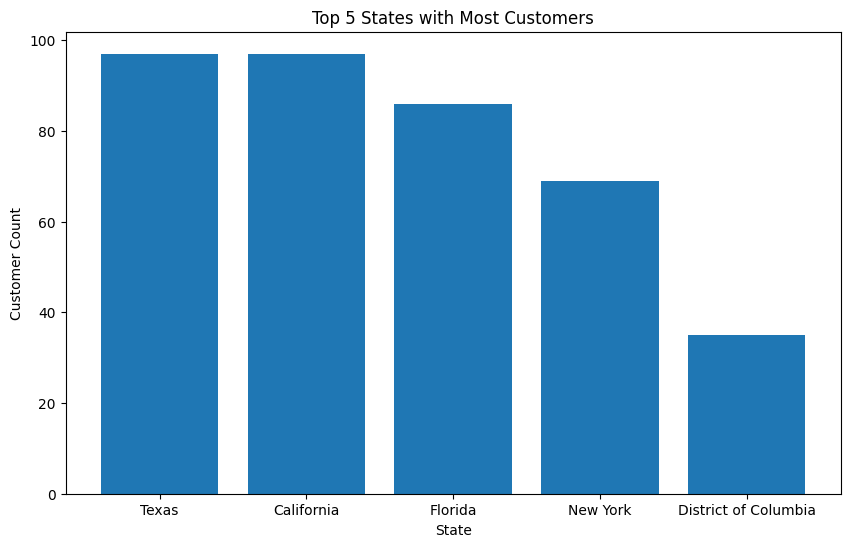

In [19]:
# [Q1] What is the distribution of customers across states? (Top 5 states)
query_top_states = """
SELECT state, COUNT(DISTINCT customer_id) AS customer_count
FROM customer_t
GROUP BY state
ORDER BY customer_count DESC
LIMIT 5;
"""

# Execute the query
result_top_states = execute_query(query_top_states)
# Display the distribution of customers across states
print("Distribution of Customers Across States:")
print(result_top_states)
print(result_q1)

# Display the bar chart for the top 5 states
plt.figure(figsize=(10, 6))
plt.bar(result_top_states['state'], result_top_states['customer_count'])
plt.xlabel('State')
plt.ylabel('Customer Count')
plt.title('Top 5 States with Most Customers')
plt.show()

/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82052/2240019407.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(query, conn)


Average Rating in Each Quarter:
   quarter_number  average_rating
0               1          3.5548
1               2          3.3550
2               3          2.9563
3               4          2.3970


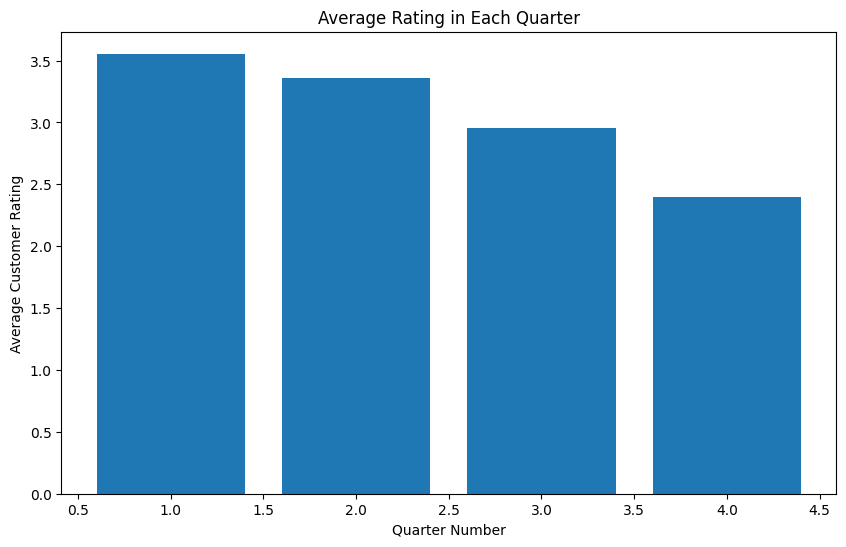

In [20]:
# [Q2] What is the average rating in each quarter?
query_q2 = """
SELECT
  quarter_number,
  AVG(
    CASE customer_feedback
      WHEN 'Very Bad' THEN 1
      WHEN 'Bad' THEN 2
      WHEN 'Okay' THEN 3
      WHEN 'Good' THEN 4
      WHEN 'Very Good' THEN 5
      ELSE NULL
    END
  ) AS average_rating
FROM order_t
WHERE customer_feedback IS NOT NULL
GROUP BY quarter_number
ORDER BY quarter_number;
"""

# Execute the query
result_q2 = execute_query(query_q2)

# Display the result
print("Average Rating in Each Quarter:")
print(result_q2)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(result_q2['quarter_number'], result_q2['average_rating'])
plt.xlabel('Quarter Number')
plt.ylabel('Average Customer Rating')
plt.title('Average Rating in Each Quarter')
plt.show()

/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82052/236679378.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Query Results:
   quarter_number  percentage_very_bad  percentage_bad  percentage_okay  \
0               1              10.9677         11.2903          19.0323   
1               2              14.8855         14.1221          20.2290   
2               3              17.9039         22.7074          21.8341   
3               4              30.6533         29.1457          20.1005   

   percentage_good  percentage_very_good  
0          28.7097               30.0000  
1          22.1374               28.6260  
2          20.9607               16.5939  
3          10.0503               10.0503  


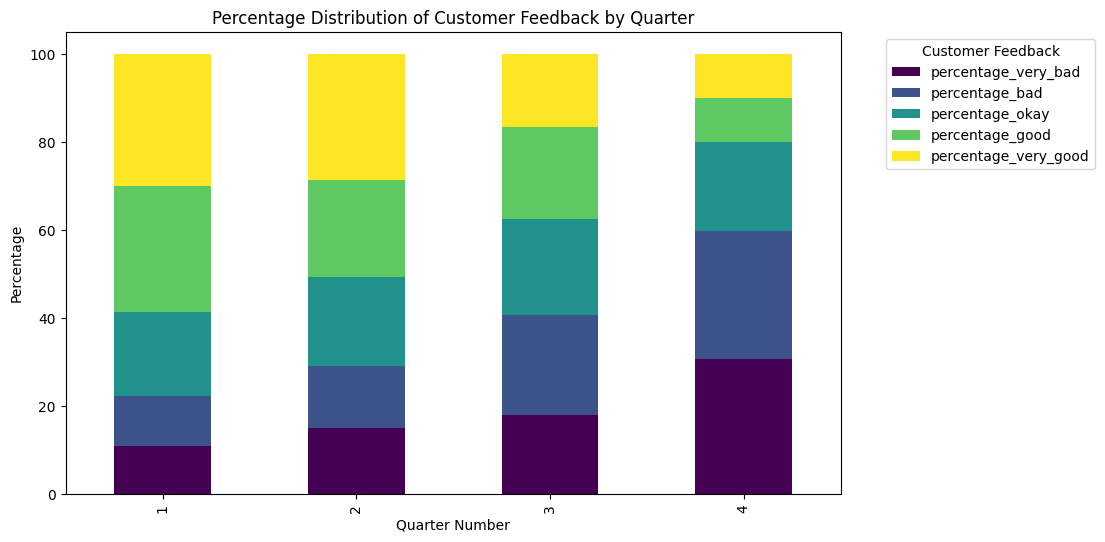

In [21]:
# Define the SQL query
query = '''
SELECT
  quarter_number,
  (COUNT(CASE WHEN customer_feedback = 'Very Bad' THEN 1 END) / COUNT(*) * 100) AS percentage_very_bad,
  (COUNT(CASE WHEN customer_feedback = 'Bad' THEN 1 END) / COUNT(*) * 100) AS percentage_bad,
  (COUNT(CASE WHEN customer_feedback = 'Okay' THEN 1 END) / COUNT(*) * 100) AS percentage_okay,
  (COUNT(CASE WHEN customer_feedback = 'Good' THEN 1 END) / COUNT(*) * 100) AS percentage_good,
  (COUNT(CASE WHEN customer_feedback = 'Very Good' THEN 1 END) / COUNT(*) * 100) AS percentage_very_good
FROM order_t
WHERE customer_feedback IS NOT NULL
GROUP BY quarter_number
ORDER BY quarter_number;
'''

# Execute the query and fetch the results into a DataFrame
df = pd.read_sql_query(query, conn)

# Print the query results
print("Query Results:")
print(df)

# Plotting the 100% stacked bar chart
ax = df.set_index('quarter_number').plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

# Adding labels and title
plt.title('Percentage Distribution of Customer Feedback by Quarter')
plt.xlabel('Quarter Number')
plt.ylabel('Percentage')
plt.legend(title='Customer Feedback', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

Top 5 Vehicle Makers Preferred by Customers:
  vehicle_maker  customer_count
0     Chevrolet              83
1          Ford              63
2        Toyota              52
3         Dodge              50
4       Pontiac              50


/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82052/1096659255.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82052/1096659255.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_count', y='vehicle_maker', data=df, palette='viridis')


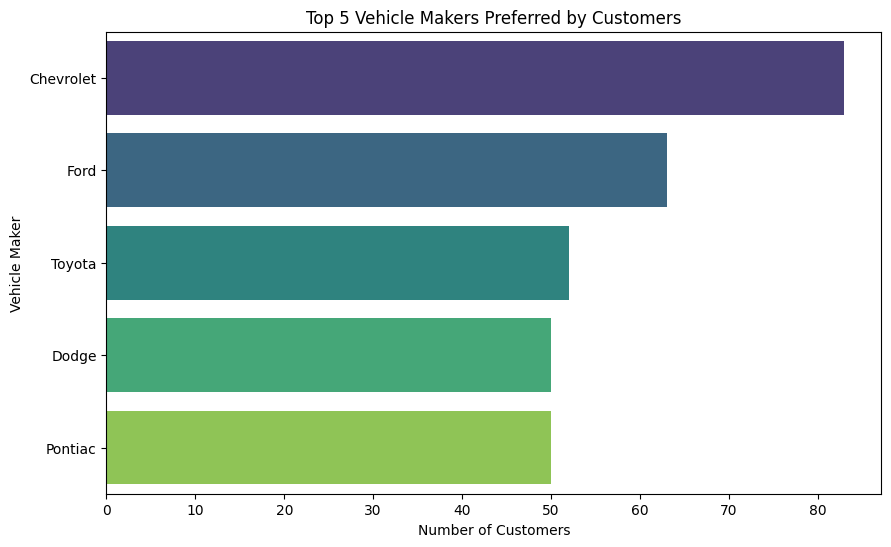

In [23]:
import seaborn as sns
# Execute the SQL query
query = """
SELECT
  p.vehicle_maker,
  COUNT(DISTINCT c.customer_id) AS customer_count
FROM product_t p
JOIN order_t o ON p.product_id = o.product_id
JOIN customer_t c ON o.customer_id = c.customer_id
GROUP BY p.vehicle_maker
ORDER BY customer_count DESC
LIMIT 5;
"""

df = pd.read_sql(query, conn)


# Print the query results
print("Top 5 Vehicle Makers Preferred by Customers:")
print(df)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_count', y='vehicle_maker', data=df, palette='viridis')
plt.title('Top 5 Vehicle Makers Preferred by Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Vehicle Maker')
plt.show()

/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82052/650646348.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_q5 = pd.read_sql(query_q5, conn)
/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82052/650646348.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='vehicle_maker', data=df_q5, palette='viridis')


Most Preferred Vehicle Make in Each State:
                   state  vehicle_maker
0                Alabama          Dodge
1                 Alaska      Chevrolet
2                Arizona        Pontiac
3               Arkansas      Chevrolet
4             California           Audi
5               Colorado      Chevrolet
6            Connecticut          Volvo
7               Delaware     Mitsubishi
8   District of Columbia      Chevrolet
9                Florida         Toyota
10               Georgia         Toyota
11                Hawaii       Cadillac
12                 Idaho          Dodge
13              Illinois           Ford
14               Indiana          Mazda
15                  Iowa      Chevrolet
16                Kansas          Buick
17              Kentucky          Acura
18             Louisiana            BMW
19                 Maine  Mercedes-Benz
20              Maryland           Ford
21         Massachusetts          Dodge
22              Michigan           Fo

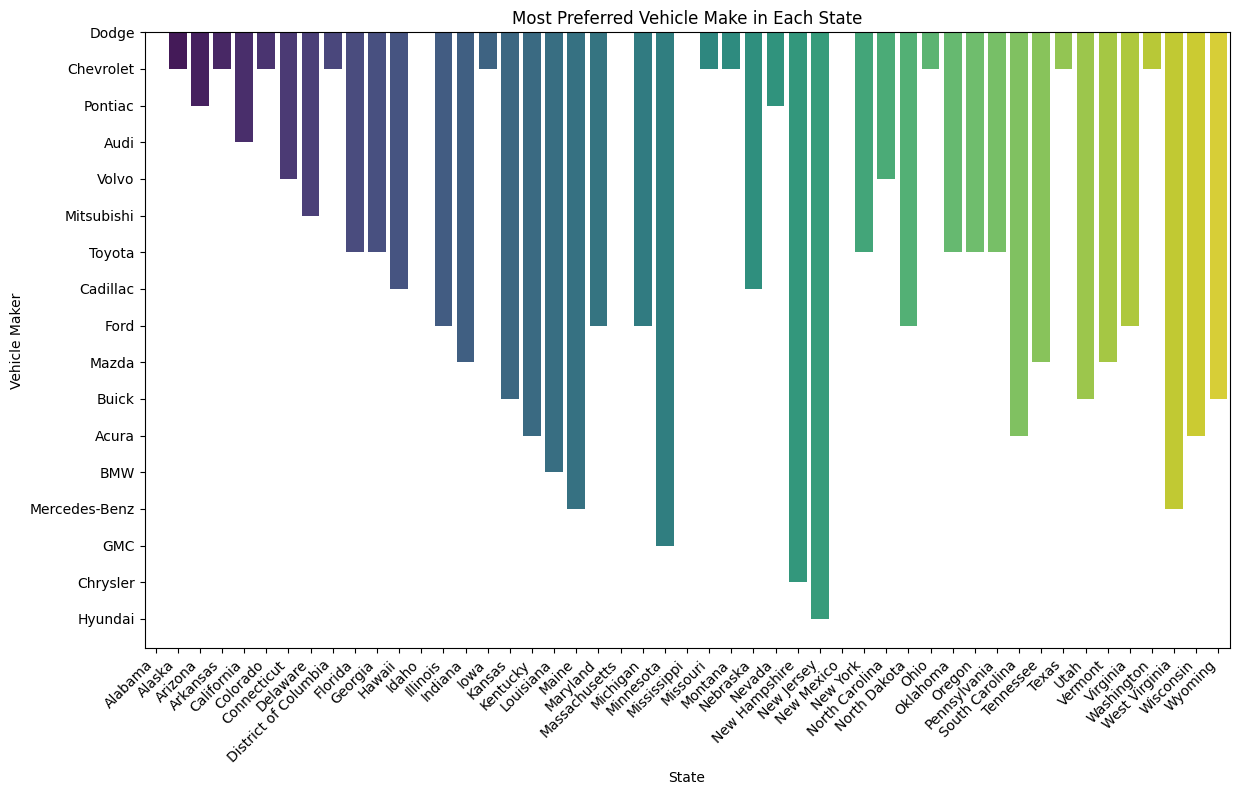

In [26]:
# Execute the SQL query for Q5
query_q5 = """
SELECT
  state,
  vehicle_maker
FROM (
  SELECT
    state,
    vehicle_maker,
    ROW_NUMBER() OVER (PARTITION BY state ORDER BY COUNT(DISTINCT c.customer_id) DESC) AS row_num
  FROM product_t p
  JOIN order_t o ON p.product_id = o.product_id
  JOIN customer_t c ON o.customer_id = c.customer_id
  GROUP BY state, vehicle_maker
) AS ranked
WHERE row_num = 1;
"""

df_q5 = pd.read_sql(query_q5, conn)

# Close the database connection
conn.close()

# Print the query results
print("Most Preferred Vehicle Make in Each State:")
print(df_q5)

# Visualize the most preferred vehicle make in each state
plt.figure(figsize=(14, 8))
sns.barplot(x='state', y='vehicle_maker', data=df_q5, palette='viridis')
plt.title('Most Preferred Vehicle Make in Each State')
plt.xlabel('State')
plt.ylabel('Vehicle Maker')
plt.xticks(rotation=45, ha='right')
plt.show()

Trend of Number of Orders by Quarters:
   quarter_number  num_orders
0               1         310
1               2         262
2               3         229
3               4         199


/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82052/3835904964.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


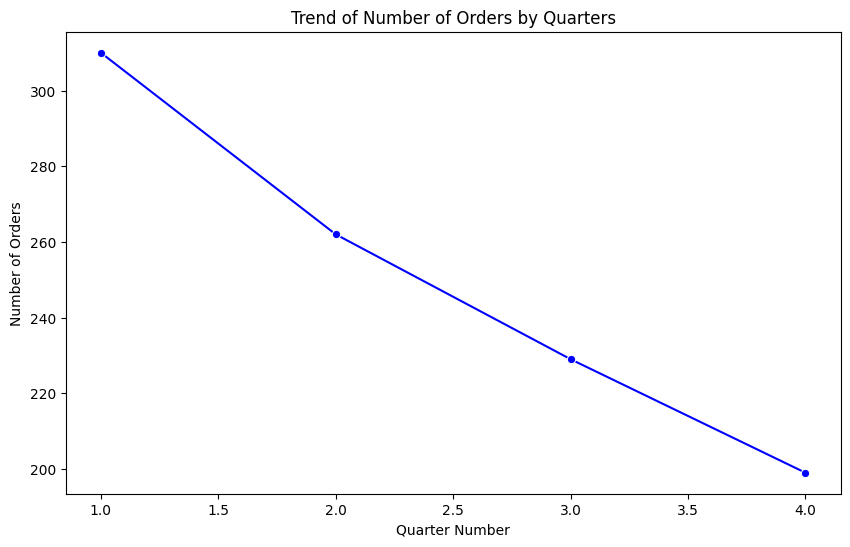

In [29]:
# Execute the SQL query
query = """
SELECT
  quarter_number,
  COUNT(DISTINCT order_id) AS num_orders
FROM order_t
GROUP BY quarter_number
ORDER BY quarter_number;
"""

df = pd.read_sql(query, conn)

# Print the query results
print("Trend of Number of Orders by Quarters:")
print(df)

# Plot a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='quarter_number', y='num_orders', data=df, marker='o', color='blue')
plt.title('Trend of Number of Orders by Quarters')
plt.xlabel('Quarter Number')
plt.ylabel('Number of Orders')
plt.show()

/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82052/1755086315.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Trend of Revenue and Orders by Quarters:
   quarter_number  total_revenue  num_orders
0               1   1.803255e+07         310
1               2   1.312300e+07         262
2               3   8.882299e+06         229
3               4   8.573149e+06         199


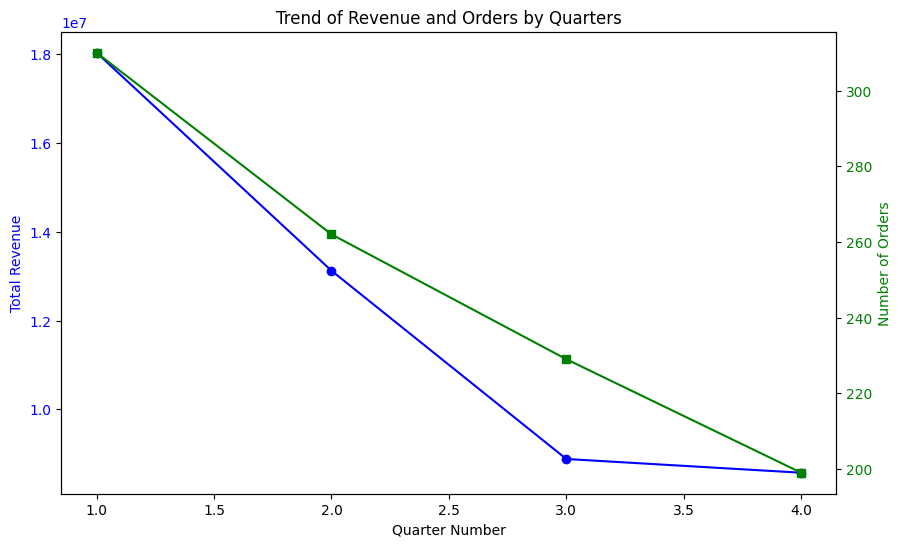

In [38]:
# Execute the SQL query
query = """
SELECT
  o.quarter_number,
  SUM(o.QUANTITY * p.VEHICLE_PRICE * (1 - o.DISCOUNT)) AS total_revenue,
  COUNT(DISTINCT o.order_id) AS num_orders
FROM order_t o
JOIN product_t p ON o.product_id = p.product_id
GROUP BY o.quarter_number
ORDER BY o.quarter_number;
"""

df = pd.read_sql(query, conn)


# Print the query results
print("Trend of Revenue and Orders by Quarters:")
print(df)

# Create a dual-axis line chart
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df['quarter_number'], df['total_revenue'], color='blue', marker='o', label='Revenue')
ax1.set_xlabel('Quarter Number')
ax1.set_ylabel('Total Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df['quarter_number'], df['num_orders'], color='green', marker='s', label='Orders')
ax2.set_ylabel('Number of Orders', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Trend of Revenue and Orders by Quarters')
plt.show()

Average Discount for Different Types of Credit Cards:
             credit_card_type  average_discount
0                         jcb          0.607382
1               visa-electron          0.623469
2                      switch          0.610233
3   diners-club-carte-blanche          0.614490
4                       laser          0.643846
5              china-unionpay          0.622174
6         diners-club-enroute          0.599792
7             americanexpress          0.616327
8                  mastercard          0.629500
9                        visa          0.600833
10                   bankcard          0.609545
11                       solo          0.585000
12                    maestro          0.624219
13          diners-club-us-ca          0.614615
14               instapayment          0.620625
15  diners-club-international          0.584000


/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82052/3809292102.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82052/3809292102.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='credit_card_type', y='average_discount', data=df, palette='viridis')


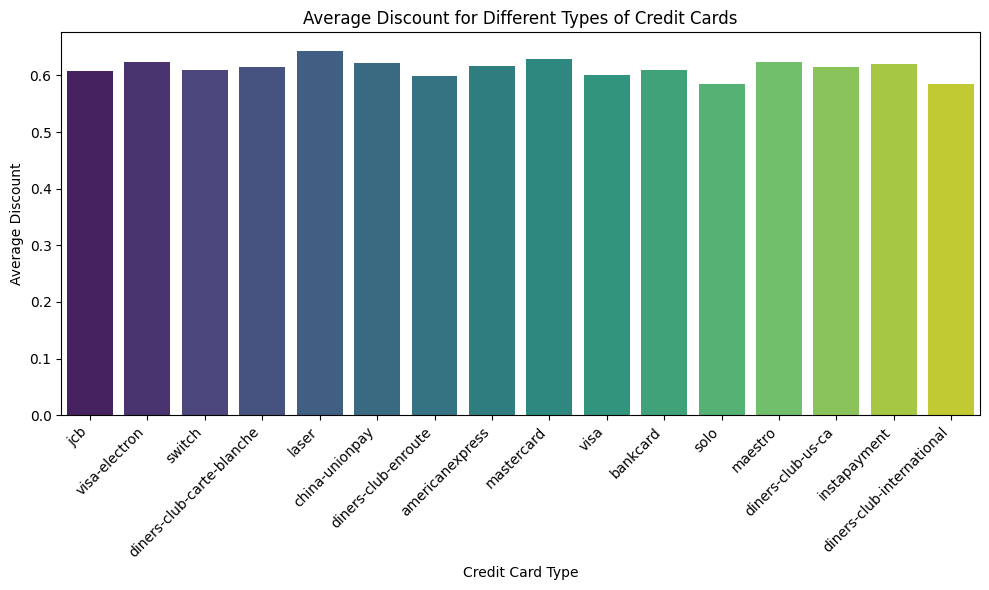

In [33]:
# Execute the SQL query
query = """
SELECT
  c.credit_card_type,
  AVG(o.discount) AS average_discount
FROM order_t o
JOIN customer_t c ON o.customer_id = c.customer_id
GROUP BY c.credit_card_type;
"""

df = pd.read_sql(query, conn)

# Print the query results
print("Average Discount for Different Types of Credit Cards:")
print(df)

# Plot a bar chart with rotated x-axis labels
plt.figure(figsize=(10, 6))
sns.barplot(x='credit_card_type', y='average_discount', data=df, palette='viridis')
plt.title('Average Discount for Different Types of Credit Cards')
plt.xlabel('Credit Card Type')
plt.ylabel('Average Discount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

Average Time to Ship for Each Quarter:
   quarter_number  average_ship_time
0               4           174.0955
1               1            57.1677
2               3           117.7555
3               2            71.1107


/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82052/783268223.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_82052/783268223.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quarter_number', y='average_ship_time', data=df, palette='viridis')


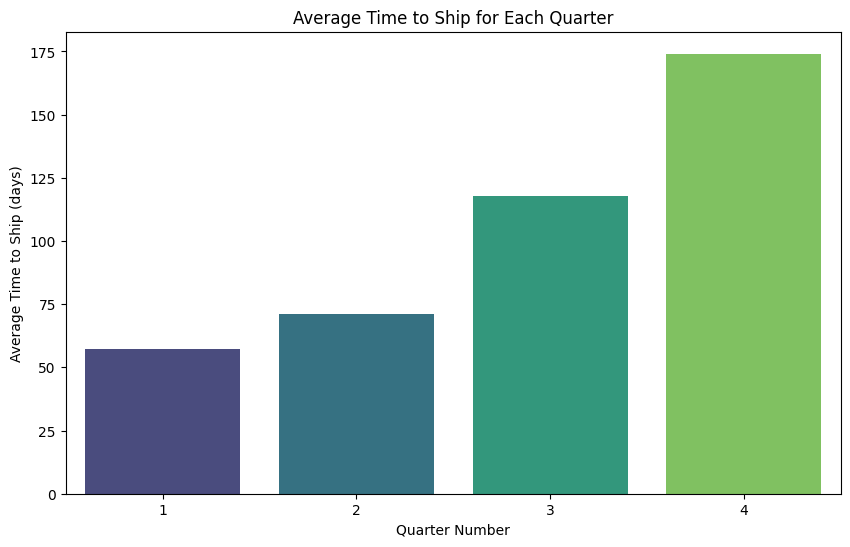

In [35]:
# Execute the SQL query
query = """
SELECT
  quarter_number,
  AVG(DATEDIFF(ship_date, order_date)) AS average_ship_time
FROM order_t
GROUP BY quarter_number;
"""

df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Print the query results
print("Average Time to Ship for Each Quarter:")
print(df)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='quarter_number', y='average_ship_time', data=df, palette='viridis')
plt.title('Average Time to Ship for Each Quarter')
plt.xlabel('Quarter Number')
plt.ylabel('Average Time to Ship (days)')
plt.show()